In [21]:
from matplotlib import pyplot as plt
import numpy as np
import pymatgen as p
import sys
from ase.io import write,read
import os
sys.path.append(os.getcwd() + '/..')
from pymatgen import Element
from tblg import tblg_nm
from pymatgen.io.ase import AseAtomsAdaptor as p2a
import pickle

In [5]:
tblg_sb=tblg_nm(4,2,d=0.9)
tblg_sb.replace_species({Element("C"): Element("Sb")})
# tblg_sb.to("cif","4-2.cif")
# atoms=p2a().get_atoms(tblg_sb)
# atoms.set_pbc([1,1,0])
# pickle.dump(atoms,open("4-2.atoms",'wb'))


In [6]:
tblg_sb.get_distance(0,1)

2.9999999999999982

In [1]:
from ase import Atoms
from ase.optimize import BFGS
from ase.calculators.emt import EMT
from ase.constraints import FixedLine as fl
from ase.io import Trajectory
import numpy as np
d = 0.9575
t = np.pi / 180 * 104.51

water = Atoms('H2O',
              positions=[(d-0.1, .1, .2),
                         (d * np.cos(t)-0.2, d * np.sin(t)+0.1, 0),
                         (0.2, 0, 0)],
              calculator=EMT())
pos=water.positions
water.set_constraint(fl([0],[0,0,1]))

dyn = BFGS(water,trajectory="test")
dyn.run(fmax=0.01)
a=Trajectory("lco.traj")
print(a[0].positions-a[-1].positions)

      Step     Time          Energy         fmax
BFGS:    0 20:10:11        7.089160       38.2223
BFGS:    1 20:10:11        5.622510       29.6604
BFGS:    2 20:10:11        4.444955       22.3631
BFGS:    3 20:10:11        3.549915       16.3701
BFGS:    4 20:10:11        2.913599       11.6585
BFGS:    5 20:10:11        2.470256        7.9273
BFGS:    6 20:10:11        2.171221        4.9556
BFGS:    7 20:10:11        1.985982        2.6268
BFGS:    8 20:10:11        1.894843        0.8698
BFGS:    9 20:10:11        1.879685        0.0883
BFGS:   10 20:10:11        1.879514        0.0127
BFGS:   11 20:10:11        1.879510        0.0138
BFGS:   12 20:10:11        1.879470        0.0286
BFGS:   13 20:10:11        1.879406        0.0451
BFGS:   14 20:10:11        1.879247        0.0652
BFGS:   15 20:10:12        1.879009        0.0613
BFGS:   16 20:10:12        1.878899        0.0254
BFGS:   17 20:10:12        1.878885        0.0074
[[ 0.          0.          0.        ]
 [ 0.       

In [22]:
from ase.io import Trajectory
atoms=Trajectory("lco.traj")
write("relaxed.cif",atoms[-1])

In [17]:
pos=atoms[-1].positions
# pos=atoms[-1].get_scaled_positions()

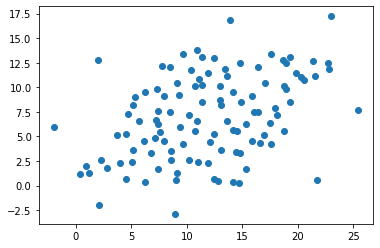

In [19]:
plt.scatter(pos.T[0],pos.T[1])

In [10]:
a=atoms[-1]

array([[1.90476190e-01, 7.61904760e-01, 5.68026444e-01],
       [3.33333330e-01, 8.33333330e-01, 6.99570940e-01],
       [4.76190480e-01, 9.04761900e-01, 4.43152932e-01],
       [1.19047620e-01, 4.76190480e-01, 4.91311986e-01],
       [2.61904760e-01, 5.47619050e-01, 5.05990781e-01],
       [4.04761900e-01, 6.19047620e-01, 4.57362541e-01],
       [5.47619050e-01, 6.90476190e-01, 5.89376013e-01],
       [6.90476190e-01, 7.61904760e-01, 5.00519530e-01],
       [8.33333330e-01, 8.33333330e-01, 6.92477616e-01],
       [9.76190480e-01, 9.04761900e-01, 4.62569012e-01],
       [1.90476190e-01, 2.61904760e-01, 5.72022822e-01],
       [3.33333330e-01, 3.33333330e-01, 6.67707338e-01],
       [4.76190480e-01, 4.04761900e-01, 5.82789108e-01],
       [6.19047620e-01, 4.76190480e-01, 4.56131934e-01],
       [7.61904760e-01, 5.47619050e-01, 4.78984408e-01],
       [9.04761900e-01, 6.19047620e-01, 5.16131129e-01],
       [4.76190500e-02, 6.90476190e-01, 5.67782593e-01],
       [1.19047620e-01, 9.76190